# House Sales in King County 

Ce jeu de données contient les prix de vente des maisons de le comté de King (état de Washington), qui comprend notamment la ville de Seattle.
Il comprend les maisons vendues entre mai 2014 et mai 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 0. Import des données

In [2]:
house_sales = pd.read_csv('../static/home_data.csv')

- À quoi ressemblent les données ?

In [3]:
house_sales.head()

id             date   price  bedrooms  bathrooms  sqft_living   
0  7129300520  20141013T000000  221900         3       1.00         1180  \
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      5650     1.0           0     0  ...      7        1180              0  \
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      1955             0    98178  47.5112 -122.257           1340  \
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

- Combien d'individus ?

In [4]:
len(house_sales)

21613

- Quels sont les types qui ont été détéctés automatiquement ?

In [5]:
house_sales.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

- Avons nous des valeurs manquantes dans certaines colonnes ?

In [6]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- Il existe aussi la méthode `info` qui combine ces informations :

In [7]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- On va convertir le champ "date" en un objet "datetime" qui permettra les comparaisons :

In [8]:
house_sales['date'] = pd.to_datetime(house_sales['date'])

- On va convertir les champs en "sq ft" vers le m² et supprimer les anciens champs :

In [9]:
# Quels sont les champs concernés ?
col_sqft = [col_name for col_name in house_sales.columns if 'sqft' in col_name]
col_sqft

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [10]:
# Pour chaque champ, on effectue la conversion
for col_name in col_sqft:
    house_sales[col_name.replace('sqft', 'sqm')] = house_sales[col_name] / 10.764

In [11]:
# On supprime les anciens champs, 'inplace' (sans faire de copie de la DataFrame)
house_sales.drop(col_sqft, axis=1, inplace=True)

- Création d'une colonne pour savoir si la maison a été rénovée depuis sa construction

In [12]:
house_sales['renovated'] = np.where(house_sales.yr_renovated > 0, True, False)
house_sales.head()

id       date   price  bedrooms  bathrooms  floors  waterfront   
0  7129300520 2014-10-13  221900         3       1.00     1.0           0  \
1  6414100192 2014-12-09  538000         3       2.25     2.0           0   
2  5631500400 2015-02-25  180000         2       1.00     1.0           0   
3  2487200875 2014-12-09  604000         4       3.00     1.0           0   
4  1954400510 2015-02-18  510000         3       2.00     1.0           0   

   view  condition  grade  ...  zipcode      lat     long  sqm_living   
0     0          3      7  ...    98178  47.5112 -122.257  109.624675  \
1     0          3      7  ...    98125  47.7210 -122.319  238.758826   
2     0          3      6  ...    98028  47.7379 -122.233   71.534745   
3     0          5      7  ...    98136  47.5208 -122.393  182.088443   
4     0          3      8  ...    98074  47.6168 -122.045  156.075808   

      sqm_lot   sqm_above  sqm_basement  sqm_living15   sqm_lot15  renovated  
0  524.897808  109.624675      0.000000    124.489038  524.897808      False  
1  672.798216  201.597919     37.160907    157.004831  709.680416       True  
2  929.022668   71.534745      0.000000    252.694166  748.978075      False  
3  464.511334   97.547380     84.541063    126.347083  464.511334      False  
4  750.650316  156.075808      0.000000    167.224080  697.045708      False  

[5 rows x 22 columns]

- On réaffiche la liste des colonnes et de leurs types :

In [13]:
house_sales.dtypes

id                       int64
date            datetime64[ns]
price                    int64
bedrooms                 int64
bathrooms              float64
floors                 float64
waterfront               int64
view                     int64
condition                int64
grade                    int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
sqm_living             float64
sqm_lot                float64
sqm_above              float64
sqm_basement           float64
sqm_living15           float64
sqm_lot15              float64
renovated                 bool
dtype: object

## 1. Explorer les données

- Quelle distribution des prix ?

<Axes: title={'center': "Price of Houses in King's County"}, ylabel='Frequency'>

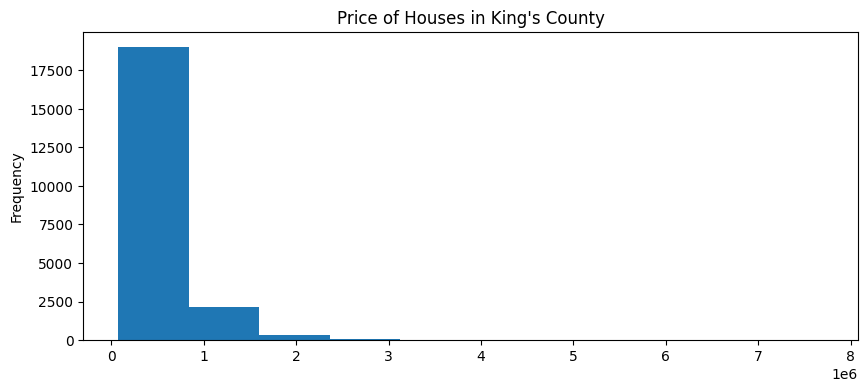

In [14]:
house_sales['price'].plot(kind="hist", figsize=(10,4), title="Price of Houses in King's County")

On peut aussi utiliser la bibliothèque`seaborn` et écrire quelques lignes de code supplémentaires pour améliorer le graphique

<Axes: title={'center': "Price Density of Houses in King's County"}, xlabel='Price in Millions', ylabel='Count'>

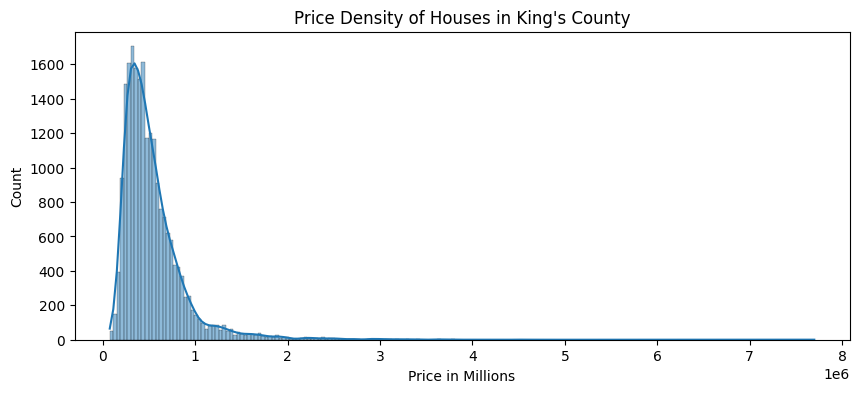

In [15]:
price_dist = sns.histplot(house_sales["price"], kde=True, bins=200)
price_dist.figure.set_size_inches(10, 4)
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
price_dist

<Axes: title={'center': "Log Price Density of Houses in King's County"}, xlabel='Log Price in Millions', ylabel='Count'>

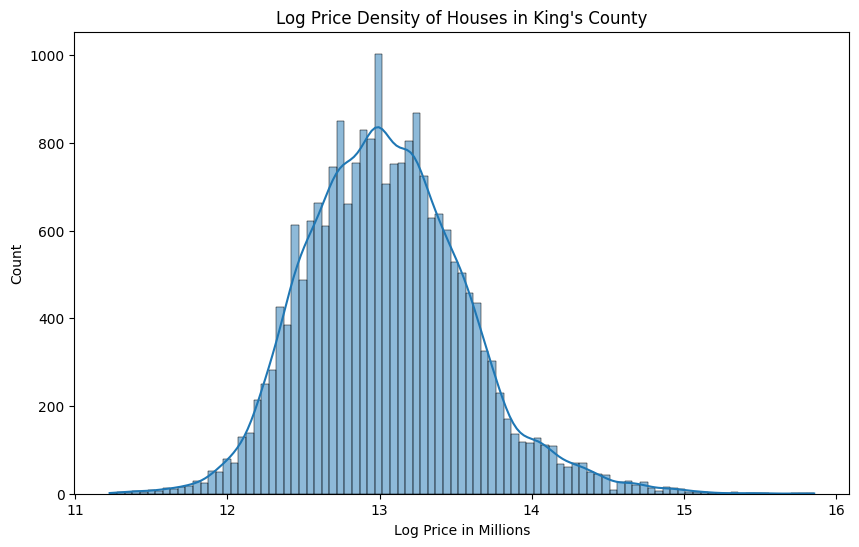

In [16]:
logged_price_dist = sns.histplot(np.log(house_sales["price"]), kde=True)
logged_price_dist.figure.set_size_inches(10,6)
logged_price_dist.set(xlabel="Log Price in Millions", title="Log Price Density of Houses in King's County")
logged_price_dist

- Combien de maisons par nombre d'étages ?

In [17]:
house_sales['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Mais le résultat est trié par le compte par étage au lieu d'être trié par le nombre d'étage.. on va y remédier...

In [18]:
count_by_floor = house_sales['floors'].value_counts()[house_sales['floors'].sort_values().unique()]
count_by_floor

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

<Axes: title={'center': 'House count by number of floors'}, xlabel='floors'>

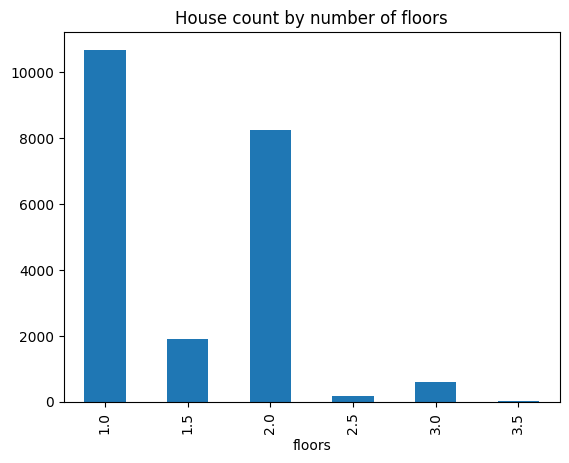

In [19]:
count_by_floor.plot(kind="bar", title="House count by number of floors")

- Utiliser la fonction `boxplot` de la bibliothèque `seaborn` pour comparer les prix des maisons avec vue sur le front de mer ou sans vue sur le front de mer :

<Axes: xlabel='waterfront', ylabel='price'>

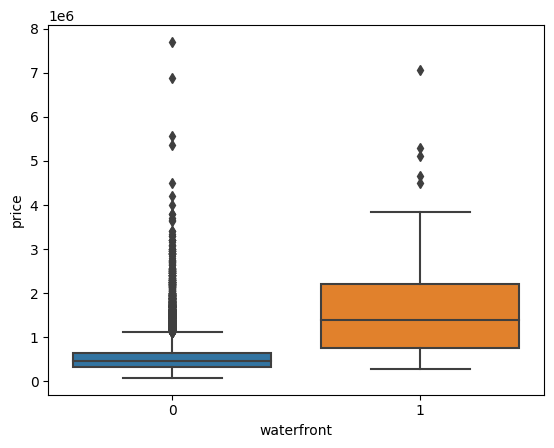

In [20]:
sns.boxplot(x=house_sales.waterfront, y=house_sales.price)

Attention, seulement 163 maisons de notre jeu de données sont face à l'eau.

In [21]:
len(house_sales[house_sales.waterfront == 1])

163

- Quelle distribution des prix au regard des notes données à chaque maisons ?

<Axes: title={'center': 'Price distribution across grade levels'}, xlabel='grade', ylabel='price'>

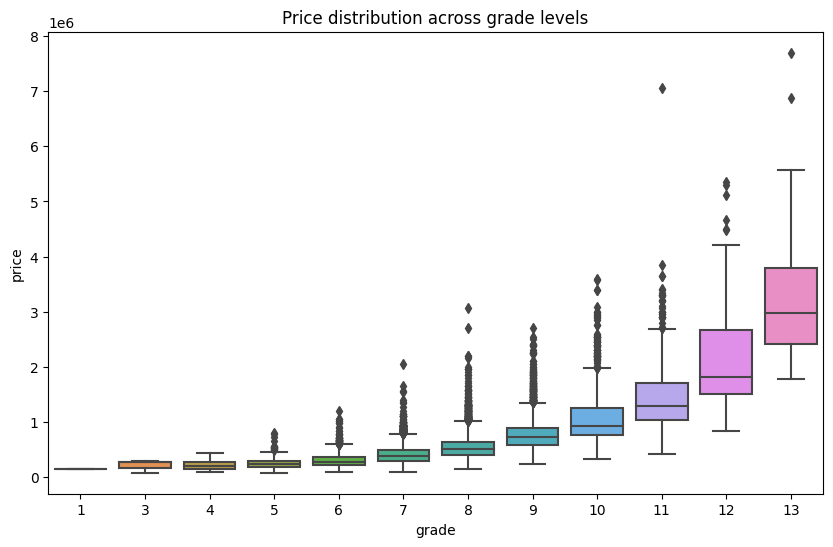

In [22]:
ax = sns.boxplot(x=house_sales['grade'], y=house_sales['price'])
ax.figure.set_size_inches(10,6)
ax.set_title('Price distribution across grade levels')
ax

- Utilisation de la méthode `corr` des `DataFrame` ("Calcul de la corrélation par paire des colonnes, en excluant les valeurs NA/nulles"), en enlevant certaines colonnes :

In [23]:
corr = house_sales.loc[:, ~house_sales.columns.isin(['id', 'date', 'lat', 'long'])].corr()
# on aurait aussi pu écrire `corr = house_sales.drop(['id', 'date', 'lat', 'long'], axis=1).corr()`
corr

price  bedrooms  bathrooms    floors  waterfront      view   
price         1.000000  0.308350   0.525138  0.256794    0.266369  0.397293  \
bedrooms      0.308350  1.000000   0.515884  0.175429   -0.006582  0.079532   
bathrooms     0.525138  0.515884   1.000000  0.500653    0.063744  0.187737   
floors        0.256794  0.175429   0.500653  1.000000    0.023698  0.029444   
waterfront    0.266369 -0.006582   0.063744  0.023698    1.000000  0.401857   
view          0.397293  0.079532   0.187737  0.029444    0.401857  1.000000   
condition     0.036362  0.028472  -0.124982 -0.263768    0.016653  0.045990   
grade         0.667434  0.356967   0.664983  0.458183    0.082775  0.251321   
yr_built      0.054012  0.154178   0.506019  0.489319   -0.026161 -0.053440   
yr_renovated  0.126434  0.018841   0.050739  0.006338    0.092885  0.103917   
zipcode      -0.053203 -0.152668  -0.203866 -0.059121    0.030285  0.084827   
sqm_living    0.702035  0.576671   0.754665  0.353949    0.103818  0.284611   
sqm_lot       0.089661  0.031703   0.087740 -0.005201    0.021604  0.074710   
sqm_above     0.605567  0.477600   0.685342  0.523885    0.072075  0.167649   
sqm_basement  0.323816  0.303093   0.283770 -0.245705    0.080588  0.276947   
sqm_living15  0.585379  0.391638   0.568634  0.279885    0.086463  0.280439   
sqm_lot15     0.082447  0.029244   0.087175 -0.011269    0.030703  0.072575   
renovated     0.126092  0.018553   0.050260  0.006260    0.093294  0.104062   

              condition     grade  yr_built  yr_renovated   zipcode   
price          0.036362  0.667434  0.054012      0.126434 -0.053203  \
bedrooms       0.028472  0.356967  0.154178      0.018841 -0.152668   
bathrooms     -0.124982  0.664983  0.506019      0.050739 -0.203866   
floors        -0.263768  0.458183  0.489319      0.006338 -0.059121   
waterfront     0.016653  0.082775 -0.026161      0.092885  0.030285   
view           0.045990  0.251321 -0.053440      0.103917  0.084827   
condition      1.000000 -0.144674 -0.361417     -0.060618  0.003026   
grade         -0.144674  1.000000  0.446963      0.014414 -0.184862   
yr_built      -0.361417  0.446963  1.000000     -0.224874 -0.346869   
yr_renovated  -0.060618  0.014414 -0.224874      1.000000  0.064357   
zipcode        0.003026 -0.184862 -0.346869      0.064357  1.000000   
sqm_living    -0.058753  0.762704  0.318049      0.055363 -0.199430   
sqm_lot       -0.008958  0.113621  0.053080      0.007644 -0.129574   
sqm_above     -0.158214  0.755923  0.423898      0.023285 -0.261190   
sqm_basement   0.174105  0.168392 -0.133124      0.071323  0.074845   
sqm_living15  -0.092824  0.713202  0.326229     -0.002673 -0.279033   
sqm_lot15     -0.003406  0.119248  0.070958      0.007854 -0.147221   
renovated     -0.060139  0.014008 -0.225195      0.999968  0.064335   

              sqm_living   sqm_lot  sqm_above  sqm_basement  sqm_living15   
price           0.702035  0.089661   0.605567      0.323816      0.585379  \
bedrooms        0.576671  0.031703   0.477600      0.303093      0.391638   
bathrooms       0.754665  0.087740   0.685342      0.283770      0.568634   
floors          0.353949 -0.005201   0.523885     -0.245705      0.279885   
waterfront      0.103818  0.021604   0.072075      0.080588      0.086463   
view            0.284611  0.074710   0.167649      0.276947      0.280439   
condition      -0.058753 -0.008958  -0.158214      0.174105     -0.092824   
grade           0.762704  0.113621   0.755923      0.168392      0.713202   
yr_built        0.318049  0.053080   0.423898     -0.133124      0.326229   
yr_renovated    0.055363  0.007644   0.023285      0.071323     -0.002673   
zipcode        -0.199430 -0.129574  -0.261190      0.074845     -0.279033   
sqm_living      1.000000  0.172826   0.876597      0.435043      0.756420   
sqm_lot         0.172826  1.000000   0.183512      0.015286      0.144608   
sqm_above       0.876597  0.183512   1.000000     -0.051943      0.731870   
sqm_baseme

- Si on veut seulement afficher la colonne "prix", trié par ordre croissant

In [24]:
corr['price'].sort_values()

zipcode        -0.053203
condition       0.036362
yr_built        0.054012
sqm_lot15       0.082447
sqm_lot         0.089661
renovated       0.126092
yr_renovated    0.126434
floors          0.256794
waterfront      0.266369
bedrooms        0.308350
sqm_basement    0.323816
view            0.397293
bathrooms       0.525138
sqm_living15    0.585379
sqm_above       0.605567
grade           0.667434
sqm_living      0.702035
price           1.000000
Name: price, dtype: float64

- Affichons cette matrice en utilisant `seaborn` :

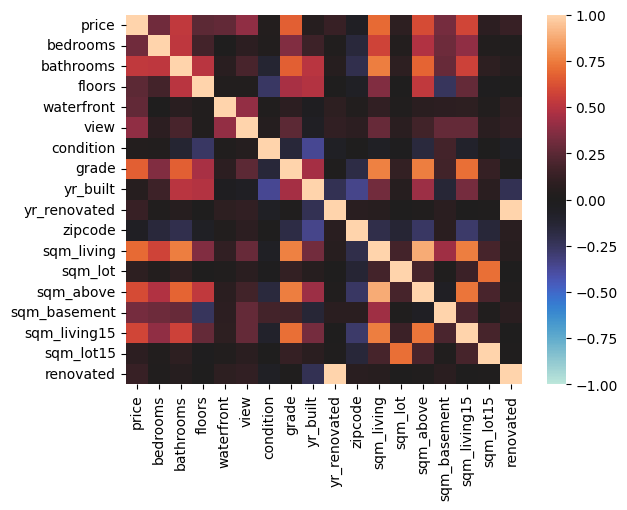

In [25]:
# Avec la palette par défaut... 
ax = sns.heatmap(
    corr, 
    vmin=-1,
    vmax=1,
    center=0,
)

- Bien entendu, il est possible de personnaliser et d'améliorer le graphique obtenu, en spécifiant
  différents paramètres lors de l'appel de la fonction `heatmap` mais aussi en utilisant l'API matplotlib
  pour spécifier certains aspects (ici l'orientation des labels sur l'axe des abscisses et la taille de la figure)

<Axes: >

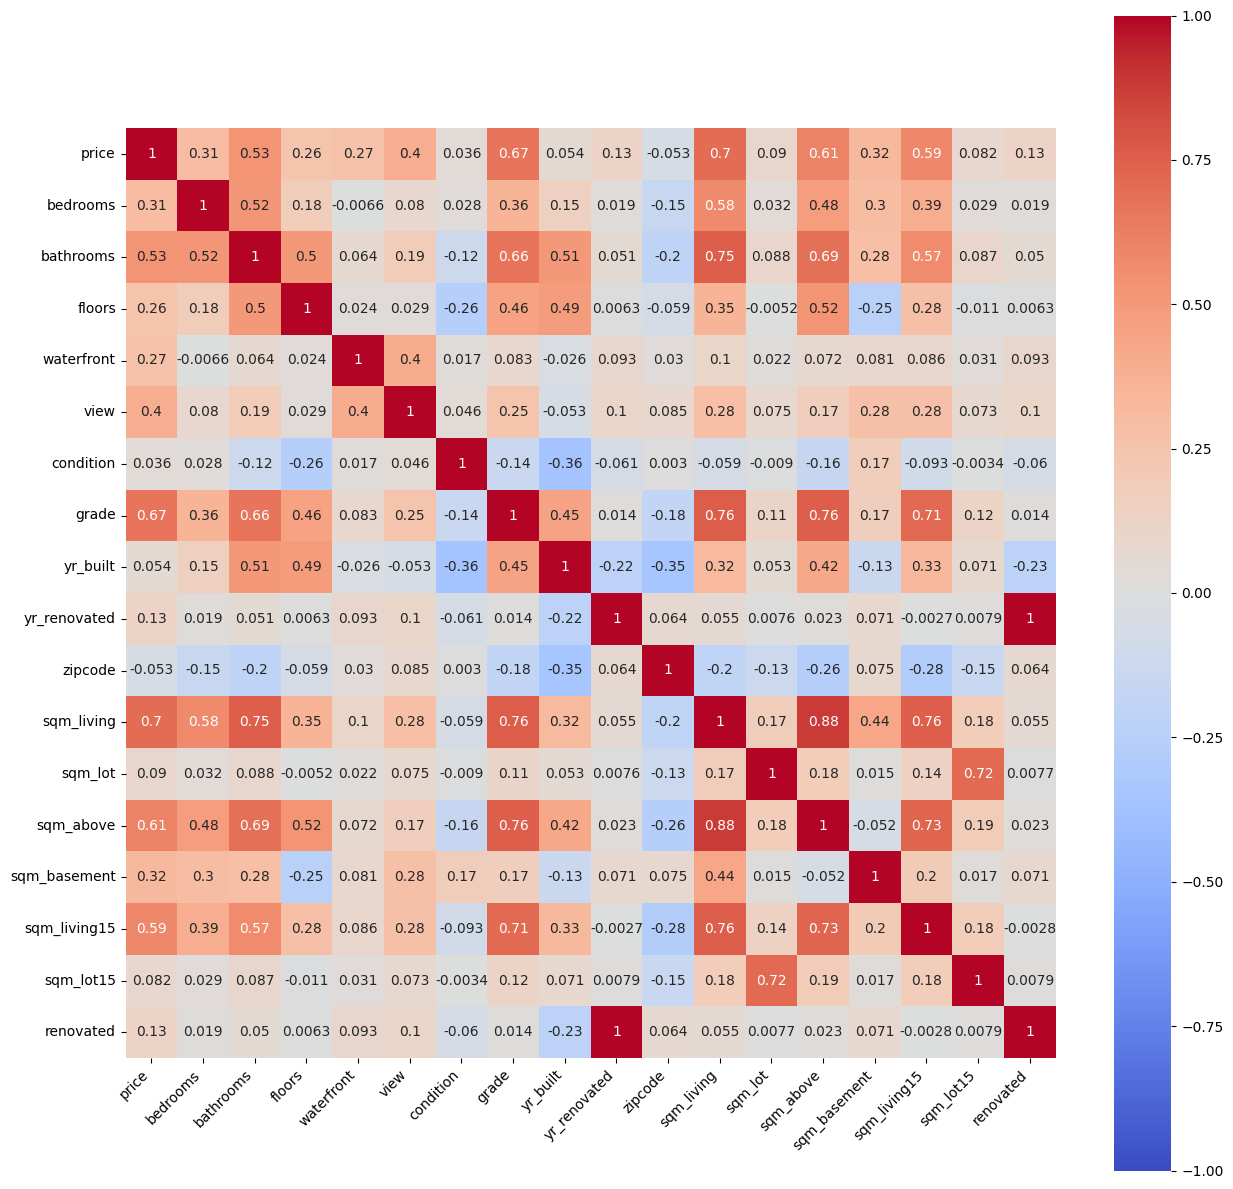

In [26]:
# En ne prenant pas en compte certaines colonnes
# et en choisissant une palette de couleurs
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
# On change la position des labels sur l'axe des abscisses
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
# Et on change la taille de la figure
ax.figure.set_size_inches(15, 15)
ax

## 2. Régression linéaire

In [27]:
x = house_sales[['sqm_living']]
y = house_sales['price']

- On peut utiliser `seaborn` et sa fonction `regplot` pour créer un scatterplot et afficher une droite de régression :

<Axes: xlabel='sqm_living', ylabel='price'>

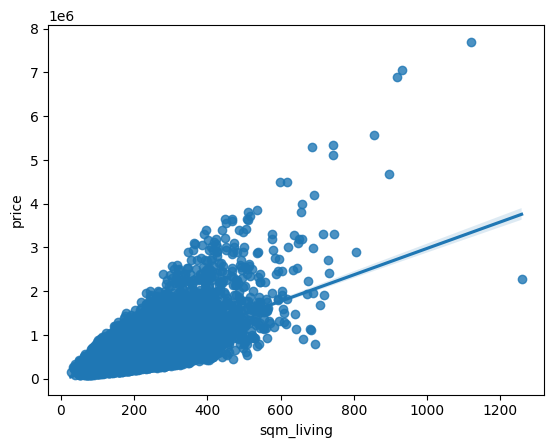

In [28]:
sns.regplot(x=x, y=y)

La bibliothèque `seaborn` se base sur matplotlib, on pourra ainsi passer des paramètres supplémentaires, en utilisant les paramètres de `matplotlib` pour personnaliser le graphique produit.
De même, elle se base sur `statsmodels`, et certaines arguments permettent d'utiliser un autre modèle de régression que celui utilisé par défaut.

In [29]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is

<Axes: xlabel='sqm_living', ylabel='price'>

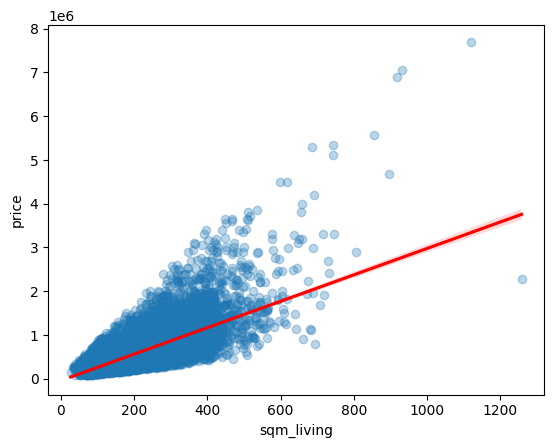

In [30]:
sns.regplot(
    x=x,
    y=y,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.3},
)

- Néanmoins, afficher cette droite n'est peut-être pas suffisant, et on pourra utiliser `statsmodels` qui propose d'estimer des modèles statistiques et d’effectuer des tests statistiques (en offrant des résumés comparables à ceux qu’on peut obtenir dans R) :

In [31]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        09:33:02   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.0

- La bibliothèque scikit-learn propose également d'utiliser des modèles de regression linéaire,
  mais plutôt du point de vue de la modélisation prédictive :

In [32]:
from sklearn import linear_model

model = linear_model.LinearRegression()
results = model.fit(x, y)

print(results.intercept_, results.coef_)

-43580.74032708525 [3020.63207124]


- On peut utiliser le modèle créé pour prédire le prix, pour une surface donnée, ici 438m2 par exemple :

In [33]:
model.predict([[438]])

/home/mthh/code/presentation-python-r-shs/env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1279456.10687803])

- On peut utiliser le modèle pour tracer la droite de régression, cette fois en utilisant seulement l'API matplotlib :

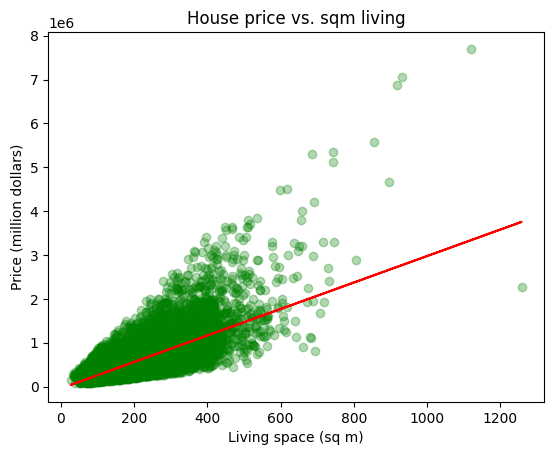

In [34]:
plt.scatter(x, y, color='g', alpha=0.3)
plt.plot(x, model.predict(x), color='r')
plt.title('House price vs. sqm living')
plt.xlabel('Living space (sq m)')
plt.ylabel('Price (million dollars)')
plt.show()

- Pas envie d'apprendre à faire ce point spécifique en Python mais plutôt en R ?

In [35]:
import rpy2.rinterface

%load_ext rpy2.ipython

In [36]:
%%R -i house_sales -o my_coef
#   ^^ avec -i et le(s) nom(s) de variable(s) Python à utiliser en R
#          ^^ avec -o et pour la sortie R vers Python
model <- lm('price ~ sqm_living', house_sales)
print(summary(model))
my_coef <- coef(model)

/home/mthh/code/presentation-python-r-shs/env/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "id". Fall back to string conversion. The error is: integer 7129300520 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '



Call:
lm(formula = "price ~ sqm_living", data = house_sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476062  -147486   -24043   106182  4362067 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43580.74    4402.69  -9.899   <2e-16 ***
sqm_living    3020.63      20.84 144.920   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261500 on 21611 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21611 DF,  p-value: < 2.2e-16



- On a bien récupérer les valeurs qu'on souhaitait dans la variable "my_coef" :

In [37]:
print(my_coef)

[-43580.74032708   3020.63207124]


## 3. Convertir le jeu de données en un jeu de données spatiales

In [38]:
import geopandas as gpd
from shapely import Point

geometry = [Point(xy) for xy in zip(house_sales.long, house_sales.lat)]
gdf = gpd.GeoDataFrame(house_sales, crs="EPSG:4326", geometry=geometry)

<Axes: >

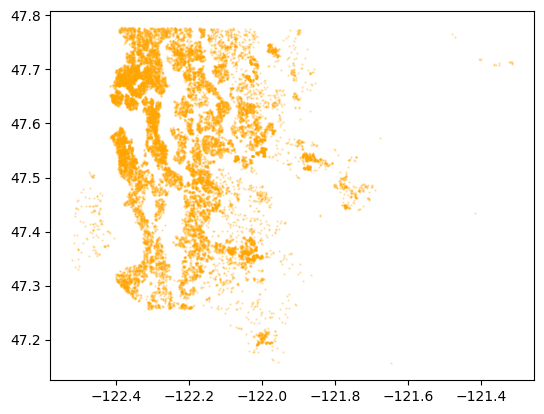

In [39]:
gdf.plot(color="orange", markersize=0.4, alpha=0.3)

- Reprojeter en Web Mercator et ajouter un fond de carte...

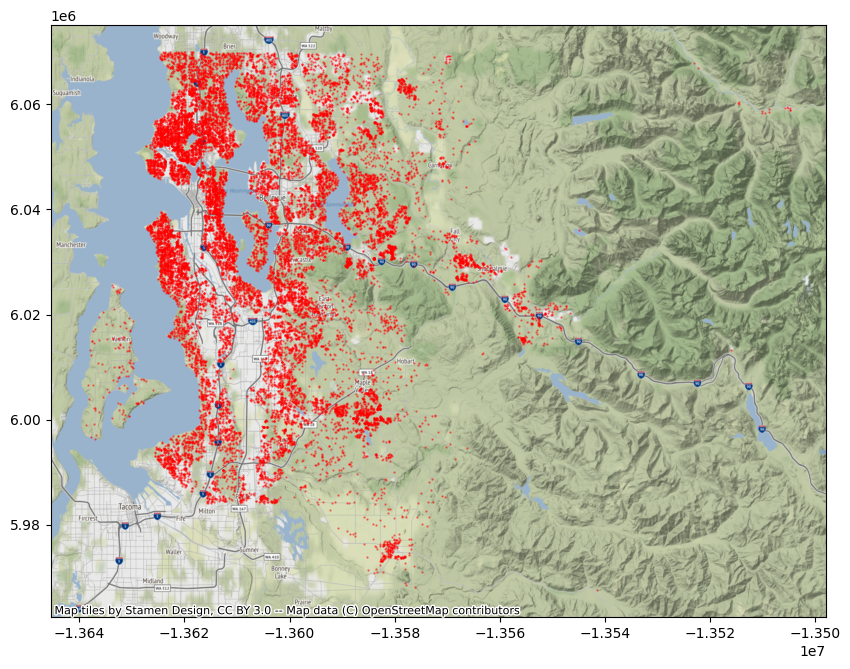

In [40]:
import contextily as cx

gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(figsize=(10, 10), color="red", markersize=0.4, alpha=0.5)
cx.add_basemap(ax)

- Calculons le prix et mètre carré et affichons plutôt cette information sur la carte :

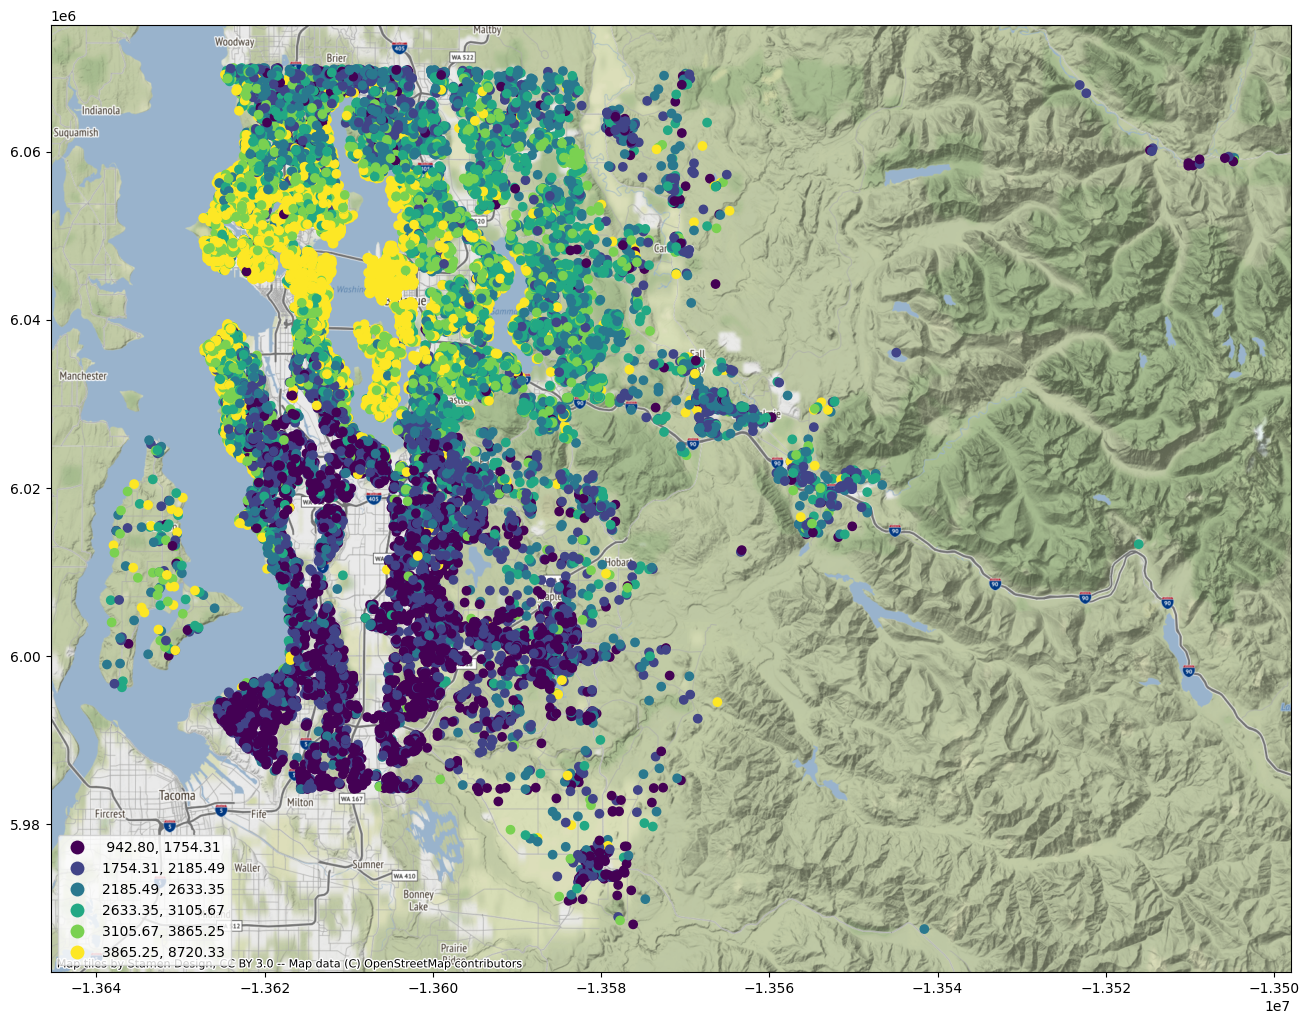

In [41]:
# price per square metre
gdf_wm['ppsqm'] = gdf_wm['price'] / gdf['sqm_living']
ax = gdf_wm.plot('ppsqm', scheme='Quantiles', k=6, figsize=(16,16), legend=True)
cx.add_basemap(ax)

- Ou faire un carte interactive à afficher dans le notebook :

In [42]:
import folium

In [43]:
# Cette fois on ne veut visualiser que les maisons au bord de l'eau
gdf_with_view = gdf[gdf.waterfront == 1]

In [44]:
# On récupére l'emprise du jeu de données
bounds = gdf_with_view.total_bounds

In [45]:
# On calcul les coordonées du centre
center = [
    (bounds[2] + bounds[0]) / 2,
    (bounds[3] + bounds[1]) / 2,
]
center # Longitude, Latitude, mais Folium veut Latitude, Longitude

[-122.28649999999999, 47.55025]

In [46]:
map = folium.Map(location=center[::-1], tiles="Stamen Terrain", zoom_start=10)

for index, row in gdf_with_view.iterrows():
    coordinates = [row['lat'], row['long']]
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup=f'''
                Prix: {row['price']}$
                <br>
                Superficie habitable: {round(row['sqm_living'], 1)}m2
            ''',
            icon=folium.Icon(color="blue"),
        )
    )

map